In [1]:
import tensorflow as tf
(x_train_original, y_train_original), (x_test_original, y_test_original) = tf.keras.datasets.mnist.load_data()
ans_model = [0] * 4

11501568/11490434 [==============================] - 0s 0us/step


In [2]:
import numpy as np
def flat_matrix(matrix, rows_num, col_num):
    return np.reshape(matrix, (rows_num, col_num))

In [3]:
print("TraningSet:")
print(x_train_original.shape)
print(y_train_original.shape)
print("TestSet:")
print(x_test_original.shape)
print(y_test_original.shape)

TraningSet:
(60000, 28, 28)
(60000,)
TestSet:
(10000, 28, 28)
(10000,)


In [4]:
print(x_train_original[0, 6:24, 6:24])

[[  0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64]
 [  0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0]
 [  0  18 219 253 253 253 253 253 198 182 247 241   0   0   0   0   0   0]
 [  0   0  80 156 107 253 253 205  11   0  43 154   0   0   0   0   0   0]
 [  0   0   0  14   1 154 253  90   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0 139 253 190   2   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0  11 190 253  70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  35 241 225 160 108   1   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  81 240 253 253 119  25   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  45 186 253 253 150  27   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  16  93 252 253 187   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 249 253 249  64   0   0   0]
 [  0   0   0   0   0   0   0   0  46 130 183 253 253 207   2   0   0   0]
 [  0   0   0   0   0   0

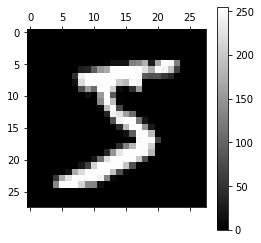

In [5]:
import matplotlib.pyplot as plt
plt.matshow(x_train_original[0], cmap = 'gray')
plt.colorbar()
plt.show()

In [6]:
print(y_train_original[0])

5


In [7]:
x_train = x_train_original.reshape((60000, 28, 28, 1))
x_test = x_test_original.reshape((10000, 28, 28, 1))
x_train = x_train/255
x_test = x_test/255

In [8]:
print("Before")
print(y_train_original.shape)
print(y_train_original[5])

Before
(60000,)
2


In [9]:
y_train = tf.keras.utils.to_categorical(y_train_original)
y_test = tf.keras.utils.to_categorical(y_test_original)

In [10]:
print("After:")
print(y_train.shape)
print(y_train[5])

After:
(60000, 10)
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten

model = Sequential()
model.add(Conv2D(16, (3, 3), activation = "relu", input_shape = x_train[0, :, :, :].shape ))
model.add(Conv2D(4, (3, 3), activation = "relu"))
model.add( Flatten())
model.add(Dense(10, activation = "relu") )
model.add(Dense(10, activation = "softmax") )
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 16)        160       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 4)         580       
                                                                 
 flatten (Flatten)           (None, 2304)              0         
                                                                 
 dense (Dense)               (None, 10)                23050     
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
Total params: 23,900
Trainable params: 23,900
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile( optimizer = 'adam', loss = "categorical_crossentropy", metrics = ["accuracy"])
history = model.fit(x_train, y_train, validation_data= (x_test, y_test), epochs = 5, batch_size=64)

Epoch 1/5
938/938 [==============================] - 47s 49ms/step - loss: 0.4266 - accuracy: 0.8666 - val_loss: 0.1633 - val_accuracy: 0.9485
Epoch 2/5
938/938 [==============================] - 45s 48ms/step - loss: 0.1576 - accuracy: 0.9528 - val_loss: 0.1254 - val_accuracy: 0.9613
Epoch 3/5
938/938 [==============================] - 48s 52ms/step - loss: 0.1200 - accuracy: 0.9644 - val_loss: 0.1013 - val_accuracy: 0.9661
Epoch 4/5
938/938 [==============================] - 45s 48ms/step - loss: 0.1009 - accuracy: 0.9702 - val_loss: 0.0938 - val_accuracy: 0.9700
Epoch 5/5
938/938 [==============================] - 46s 49ms/step - loss: 0.0849 - accuracy: 0.9747 - val_loss: 0.0773 - val_accuracy: 0.9759


In [13]:
print(history.params)

{'verbose': 1, 'epochs': 5, 'steps': 938}


<function matplotlib.pyplot.show>

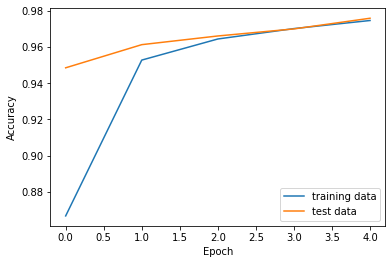

In [14]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["training data", "test data"], loc="lower right")
plt.show

In [15]:
test_loss, test_acc = model.evaluate(x_test, y_test)
ans_model[0] = test_acc
print('test_acc', test_acc)

313/313 [==============================] - 3s 8ms/step - loss: 0.0773 - accuracy: 0.9759
test_acc 0.9758999943733215


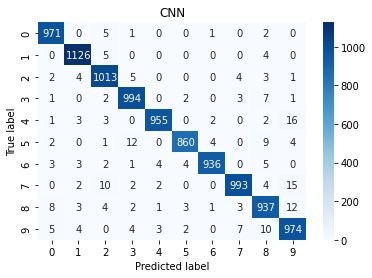

In [16]:
from sklearn.metrics import confusion_matrix
import numpy as np
y_predict=model.predict(x_test)
confusion = confusion_matrix(np.argmax(y_test,axis=1), np.argmax(y_predict,axis=1))

import seaborn as sns

sns.heatmap(confusion, annot=True, cmap='Blues', fmt='g')

plt.title('CNN', fontsize = 12)
plt.xlabel('Predicted label', fontsize = 10) 
plt.ylabel('True label', fontsize = 10)

plt.show()